In [2]:
import os.path as ops
import numpy as np
import torch
import cv2
import sys
sys.path.append('..')
from dataset.dataset_utils import TUSIMPLE

# Build The datasets

In [3]:
# root = '/Users/smiffy/Documents/GitHub/TUSIMPLE/Data_Tusimple_PyTorch/training'
root = '/Users/smiffy/Documents/GitHub/TUSIMPLE/txt_for_local'

train_set = TUSIMPLE(root=root, flag='train')
valid_set = TUSIMPLE(root=root, flag='valid')
test_set = TUSIMPLE(root=root, flag='test')

print('train_set length {}'.format(len(train_set)))
print('valid_set length {}'.format(len(valid_set)))
print('test_set length {}'.format(len(test_set)))

train_set length 3082
valid_set length 181
test_set length 363


In [4]:
gt, bgt, igt = train_set[280]
print('image type {}'.format(type(gt)))
print('image size {} \n'.format(gt.size()))

print('gt binary image type {}'.format(type(bgt)))
print('gt binary image size {}'.format(bgt.size()))
print('items in gt binary image {} \n'.format(torch.unique(bgt)))

print('gt instance type {}'.format(type(igt)))
print('gt instance size {}'.format(igt.size()))
print('items in gt instance {} \n'.format(torch.unique(igt)))

image type <class 'torch.Tensor'>
image size torch.Size([3, 256, 512]) 

gt binary image type <class 'torch.Tensor'>
gt binary image size torch.Size([256, 512])
items in gt binary image tensor([0, 1]) 

gt instance type <class 'torch.Tensor'>
gt instance size torch.Size([256, 512])
items in gt instance tensor([  0,  20,  70, 120, 170]) 



# Show the images

In [5]:
image_show = ((gt.numpy() + 1) * 127.5).astype(int)

In [6]:
image_show.shape

(3, 256, 512)

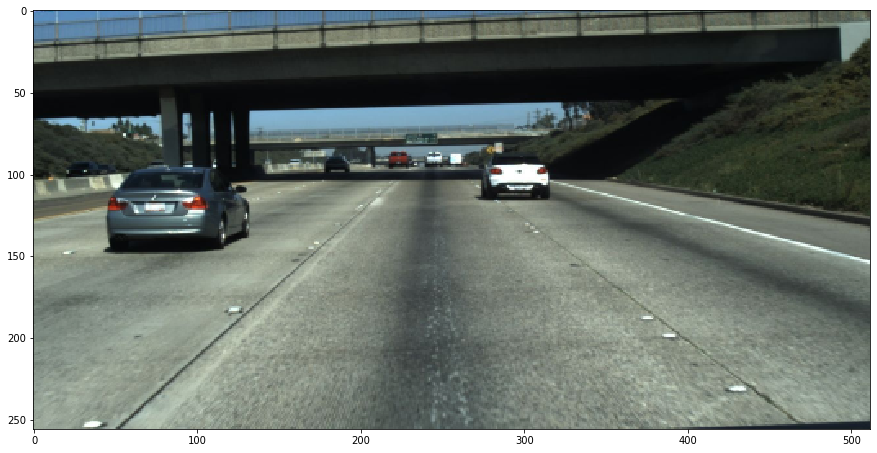

In [7]:
import matplotlib.pyplot as plt
# image_show = image_show[...,::-1]
plt.figure(figsize=(15,15))
image_show = image_show.transpose(1,2,0)
image_show = image_show[...,::-1]
plt.imshow(image_show)

In [8]:
bgt.shape

torch.Size([256, 512])

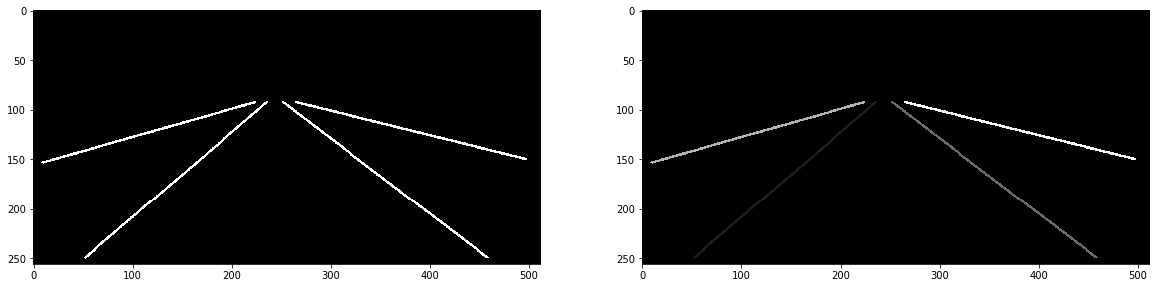

In [9]:
plt.figure(figsize=(20,20))
ax1 = plt.subplot(121)
plt.imshow(bgt, cmap='gray')
ax1 = plt.subplot(122)
plt.imshow(igt, cmap='gray')